# test.ipynb

In [ ]:
%run test.ipynb

ERROR:root:File `'test.ipynb.py'` not found.


In [ ]:
import tensorflow as tf

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

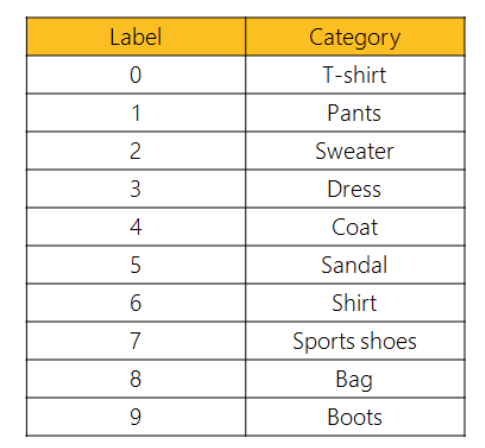

In [ ]:
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(len(train_X))
print(len(test_X))

60000
10000


In [ ]:
import matplotlib.pyplot as plt

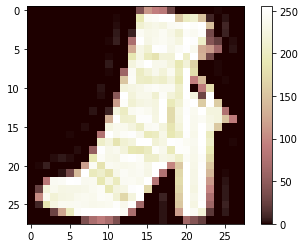

In [ ]:
plt.imshow(train_X[11], cmap = 'pink') # 독립변수 60000개 중에서 11번 이미지 호출
plt.colorbar()
plt.show()

In [ ]:
print("train_Y[11] : ", train_Y[11])

train_Y[11] :  9


In [ ]:
print(train_X[11])

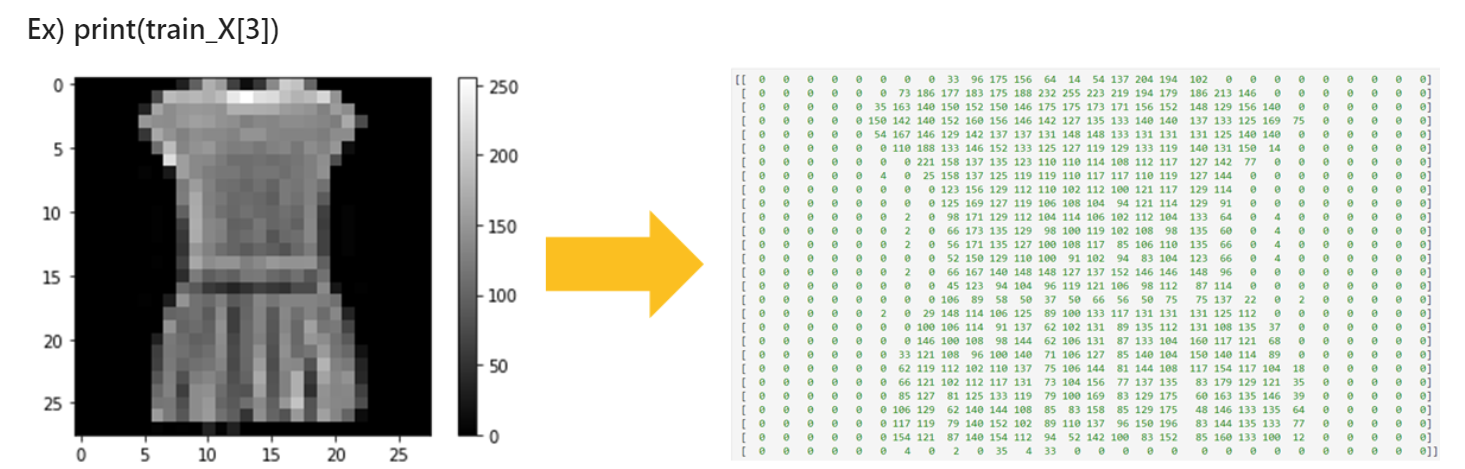

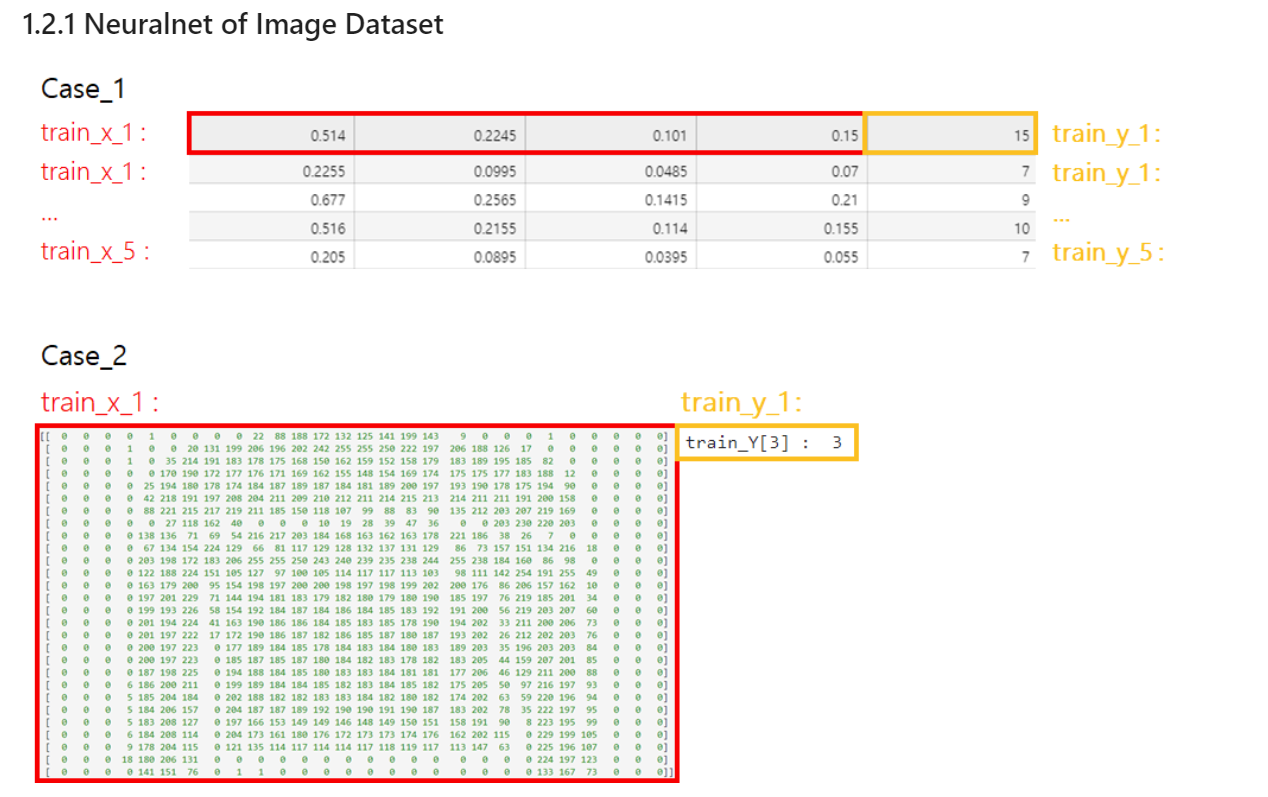

In [ ]:
print("train_X[0].shape :", train_X[0].shape) # 행렬
print("train_X[0].ndim :", train_X[0].ndim) # 차원

train_X[0].shape : (28, 28)
train_X[0].ndim : 2


In [ ]:
train_X_flat = train_X[0].flatten() # 독립변수 784개가 생성
print("train_X_flat.shape : ", train_X_flat.shape)
print("train_X_flat.ndim : ", train_X_flat.ndim)

train_X_flat.shape :  (784,)
train_X_flat.ndim :  1


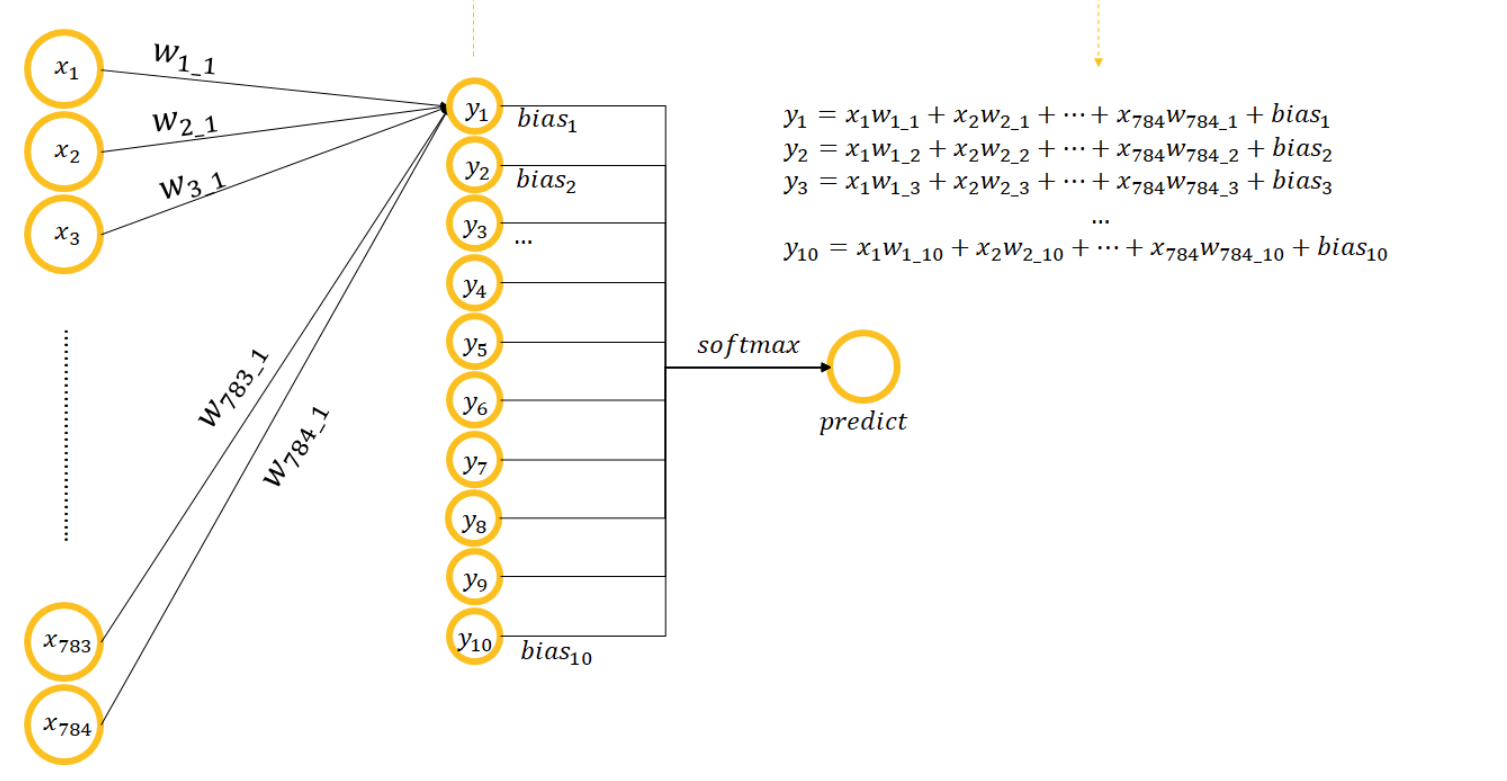

Numpy의 행렬곱 함수

1. np.matmul()

2. np.dot()

1,2차원의 결과값은 같으나 3차원 이상부터는 조금씩 달라진다.

In [ ]:
input_x = len(train_X_flat)
print("input_x :", input_x)
output_y = len(set(train_Y)) # 집합화 시켜 중복을 없애줌
print("output_y : ", output_y)

input_x : 784
output_y :  10


In [ ]:
train_Y

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
import numpy as np

In [ ]:
RAN_MEAN = 0 
RAN_STD  = 1

weight = np.random.normal(RAN_MEAN, RAN_STD, size = [input_x, output_y])
bias = np.random.normal(RAN_MEAN, RAN_STD, size = [output_y])

In [ ]:
parameter = {'w' : weight, 'b' : bias}

print("가중치의 행과 열, 차원 수")

print(parameter['w'].shape)
print(parameter['w'].ndim)

print("편향의 행과 열, 차원 수")

print(parameter['b'].shape)
print(parameter['b'].ndim)

가중치의 행과 열, 차원 수
(784, 10)
2
편향의 행과 열, 차원 수
(10,)
1


In [ ]:
import pandas as pd

In [ ]:
 # 판다스 이용, 데이터프레임화

df_w = pd.DataFrame(parameter['w'],
                    columns = ['w1','w2','w3','w4','w5','w6','w7','w8','w9','w10']) 

df_b = pd.DataFrame(parameter['b'],
                    columns = ['b'])

df_x = pd.DataFrame(train_X_flat, columns= ['input_data'])

In [ ]:
df_data = pd.concat([df_x, df_w, df_b], axis = 1)

In [ ]:
display(df_data)

,input_data,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,b
0,0,-0.816576,0.204540,-0.214474,-0.671837,2.310358,-0.450487,-0.407895,-1.370243,1.231430,-0.774947,-0.813548
1,0,2.456860,0.552390,-0.063857,-0.922850,1.073283,-0.379489,0.538103,0.627970,-0.438249,-0.767101,0.105680
2,0,1.563273,-0.410297,1.357178,1.543953,0.460764,-1.127418,1.158030,-0.437037,-0.394524,-1.413176,-0.642188
3,0,0.900735,-0.578419,-0.304227,-0.612645,0.334144,0.718064,-1.115066,0.496028,1.258719,-1.559926,0.726421
4,0,-0.464744,1.535833,0.155844,-1.027825,-1.082599,-0.357639,-2.206042,0.408886,0.694769,-0.385249,-0.213493
...,...,...,...,...,...,...,...,...,...,...,...,...
779,0,0.158158,1.698940,0.089464,0.101371,-0.301576,-0.161355,0.232579,-0.573589,-0.914812,0.415668,NaN
780,0,1.356415,-0.366644,-0.809188,0.357792,-1.327773,1.778440,0.411342,-0.126181,0.990148,-2.078861,NaN
781,0,-1.256704,-0.862323,0.239785,-0.330685,2.035164,0.018796,-0.724369,-0.044118,1.097915,-0.004541,NaN
782,0,1.729629,-0.968130,1.534650,-0.623071,0.216120,-1.461729,-0.999752,-0.184792,1.326867,1.021351,NaN


In [ ]:
y_hat_1 = np.matmul(df_data['input_data'], df_data['w1']) + df_data['b'][0]
y_hat_2 = np.matmul(df_data['input_data'], df_data['w2']) + df_data['b'][1]
y_hat_3 = np.matmul(df_data['input_data'], df_data['w3']) + df_data['b'][2]
y_hat_4 = np.matmul(df_data['input_data'], df_data['w4']) + df_data['b'][3]
y_hat_5 = np.matmul(df_data['input_data'], df_data['w5']) + df_data['b'][4]
y_hat_6 = np.matmul(df_data['input_data'], df_data['w6']) + df_data['b'][5]
y_hat_7 = np.matmul(df_data['input_data'], df_data['w7']) + df_data['b'][6]
y_hat_8 = np.matmul(df_data['input_data'], df_data['w8']) + df_data['b'][7]
y_hat_9 = np.matmul(df_data['input_data'], df_data['w9']) + df_data['b'][8]
y_hat_10 = np.matmul(df_data['input_data'], df_data['w10']) + df_data['b'][9]

In [ ]:
print(y_hat_1)
print(y_hat_2)
print(y_hat_3)
print(y_hat_4)
print(y_hat_5)
print(y_hat_6)
print(y_hat_7)
print(y_hat_8)
print(y_hat_9)
print(y_hat_10)

-5921.402237416685
660.0138250274947
-2612.14104613215
-5706.06647975782
4178.635662151236
3508.3300184697346
-411.7583090928939
2324.590777787142
3432.0369561042608
-3809.0937906076238


In [ ]:
y_hat_total = np.matmul(df_data['input_data'], parameter['w']) + parameter['b']
print(y_hat_total)

[-5921.40223742   660.01382503 -2612.14104613 -5706.06647976
  4178.63566215  3508.33001847  -411.75830909  2324.59077779
  3432.0369561  -3809.09379061]


In [ ]:
# 자율 상수를 Numpy로 구현
print(np.exp(-10))
print(np.exp(1))
print(np.exp(10))
print(np.exp(100))

4.5399929762484854e-05
2.718281828459045
22026.465794806718
2.6881171418161356e+43


In [ ]:
print(np.exp(y_hat_total))

[0.00000000e+000 4.36880026e+286 0.00000000e+000 0.00000000e+000
             inf             inf 1.49843698e-179             inf
             inf 0.00000000e+000]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


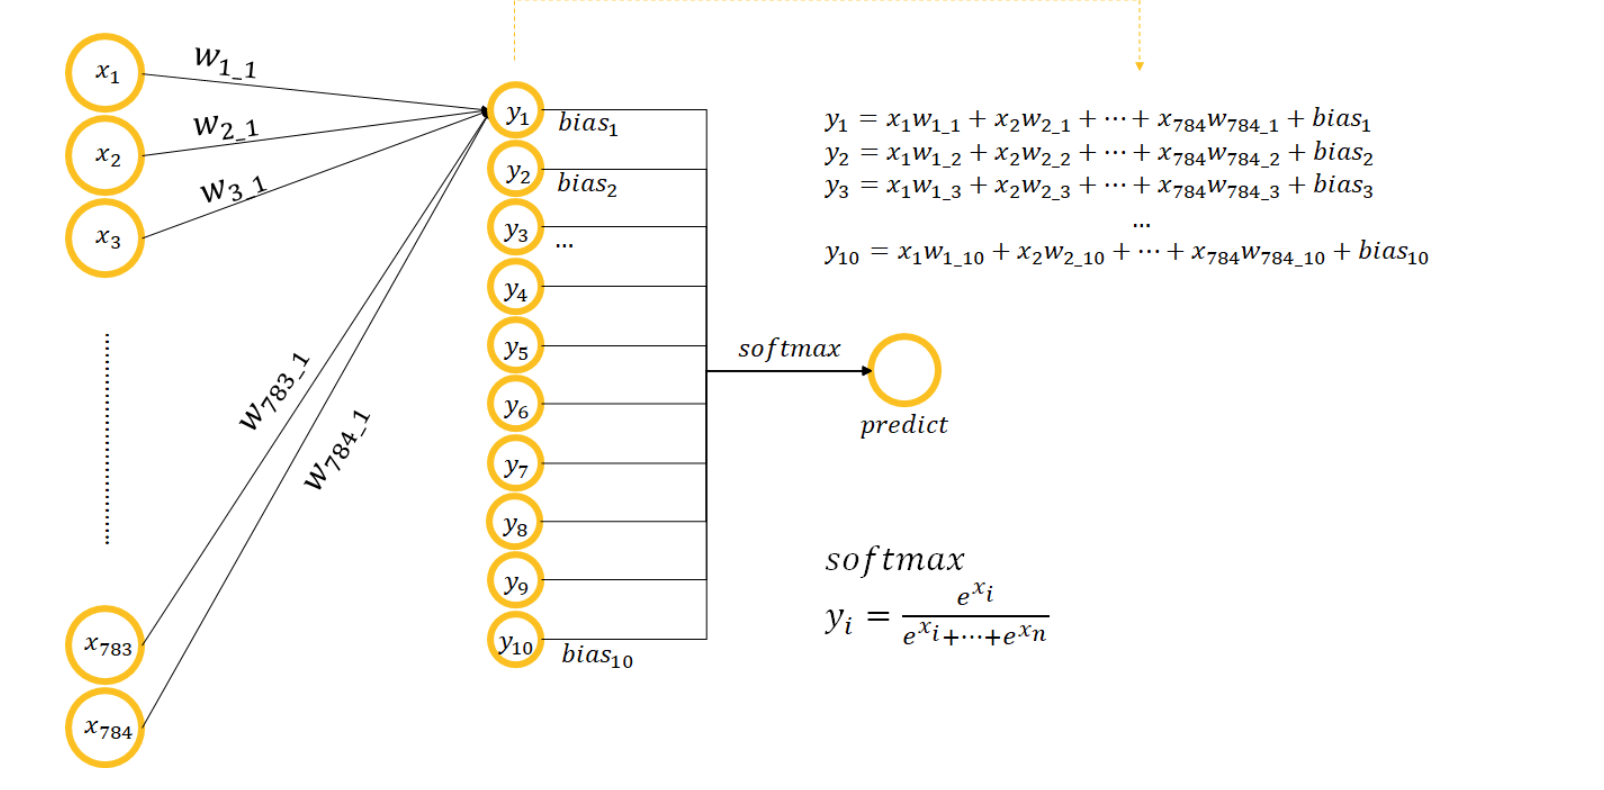

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSBkze_uBx_68bV8mYN00O6Q2s7JVsvqWbhqGiRd3cpzWJ4f2gweVqGF4xAOyLPMC51_g&usqp=CAU">

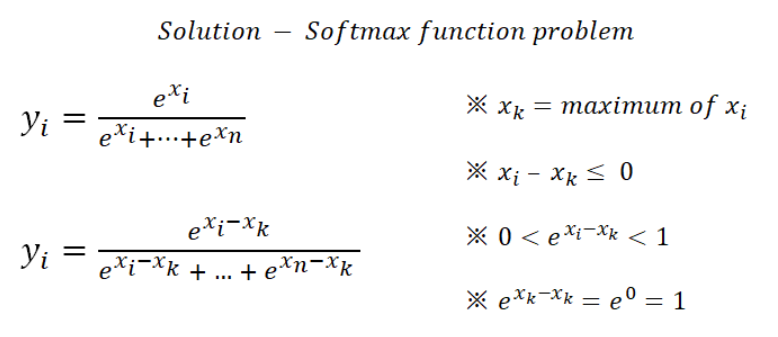

In [ ]:
f_mnist_max = np.max(y_hat_total)
print("f_mnist_max :", f_mnist_max)

f_mnist_max : 4178.635662151238


In [ ]:
diff_y_hat_row = []
for i in range(len(y_hat_total)):
    diff_y_hat = y_hat_total[i] - f_mnist_max
    diff_y_hat_row.append(diff_y_hat)

print("diff_y_hat_row: \n", diff_y_hat_row)

diff_y_hat_row: 
 [-10100.037899567924, -3518.621837123745, -6790.776708283387, -9884.70214190906, 0.0, -670.3056436815059, -4590.3939712441315, -1854.0448843640934, -746.5987060469788, -7987.729452758864]


In [ ]:
exp_y_hat_row = []
for i in range(len(diff_y_hat_row)):
    exp_y_hat = np.exp(diff_y_hat_row[i])
    exp_y_hat_row.append(exp_y_hat)

print("exp_y_hat_row : \n", exp_y_hat_row)

exp_y_hat_row : 
 [0.0, 0.0, 0.0, 0.0, 1.0, 7.761716224982801e-292, 0.0, 0.0, 0.0, 0.0]


In [ ]:
exp_i_sum = np.sum(exp_y_hat_row)

result = []
for i in range(len(exp_y_hat_row)):
    result.append(exp_y_hat_row[i] / exp_i_sum)

for i in range(len(result)):
    print("Lable {} : {} %".format(i, np.round(result[i] * 100,2)))

print("==============================")
print("가장 높은 확률은 {} 라벨 입니다.".format(np.argmax(result)))
print("실제 라벨은 {} 입니다.".format(train_Y[0]))
# 결과값이 다른 이유는 학습을 시키지 않았기 때문

Lable 0 : 0.0 %
Lable 1 : 0.0 %
Lable 2 : 0.0 %
Lable 3 : 0.0 %
Lable 4 : 100.0 %
Lable 5 : 0.0 %
Lable 6 : 0.0 %
Lable 7 : 0.0 %
Lable 8 : 0.0 %
Lable 9 : 0.0 %
가장 높은 확률은 4 라벨 입니다.
실제 라벨은 9 입니다.
